In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import librosa as lb

import os


# Handeling Class Imbalance

In [ ]:
diagnosis=pd.read_csv('/content/drive/MyDrive/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

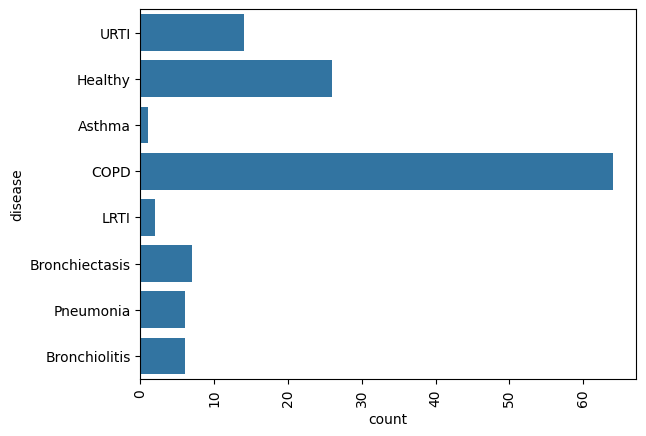

In [ ]:
sns.countplot(diagnosis.disease)
plt.xticks(rotation=90)

> We will try to extract **Id** of each processed audio file and then merge them with their respective **class label** so we can split files in to train and validation folder in **stratified manner**

In [ ]:
import os
def extractId(filename):
    return filename.split('_')[0]

In [ ]:
path='/content/drive/MyDrive/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,147,147_1b2_Tc_mc_AKGC417L_4.wav
1,147,147_2b2_Ar_mc_AKGC417L_4.wav
2,147,147_1b2_Tc_mc_AKGC417L_10.wav
3,147,147_2b3_Al_mc_AKGC417L_3.wav
4,147,147_1b2_Tc_mc_AKGC417L_8.wav


In [ ]:
files_df.pid=files_df.pid.astype('int64')

In [ ]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,147,147_1b2_Tc_mc_AKGC417L_4.wav,COPD
1,147,147_2b2_Ar_mc_AKGC417L_4.wav,COPD
2,147,147_1b2_Tc_mc_AKGC417L_10.wav,COPD
3,147,147_2b3_Al_mc_AKGC417L_3.wav,COPD
4,147,147_1b2_Tc_mc_AKGC417L_8.wav,COPD


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

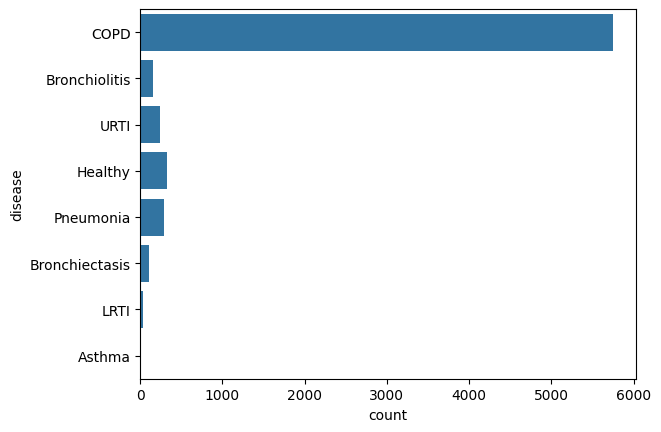

In [ ]:
sns.countplot(data.disease)
plt.xticks(rotation=360)

> We can see that classes are very **skewed**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

* Above i used the **stratify** arg of **train_test_split** and set it to disease to stratify data based on **class labels**

In [ ]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

disease
COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: count, dtype: float64

In [ ]:
Xval.disease.value_counts()/Xval.shape[0]

disease
COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: count, dtype: float64

# Visualizing MFCCS

[Text(0.5, 1.0, 'MFCC')]

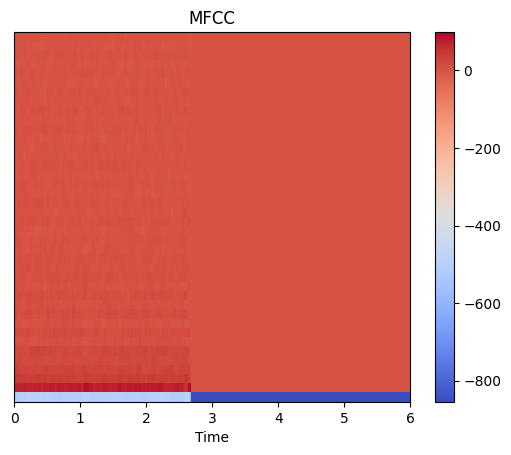

In [ ]:
path='/content/drive/MyDrive/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

* Here I am going to output **train & test datasets** so that i can use the **filenames** in then in another notebook where i will try other **feature extraction** methods inclusive of MFCC's and adopt the one or many based on **performance**.

In [ ]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')